# Clustering

### 1) k-Means

In [1]:
import pandas as pd
dataset = pd.read_csv("Iris.csv")
X = dataset.drop('class', axis=1)
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn import datasets, metrics, cluster, mixture

# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=3, random_state=1)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [3]:
# check the produced clusters
y_pred = kmeans_model.labels_
print("Produced clusters:\n",y_pred.tolist())

Produced clusters:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]


In [4]:
# compare against ground truth
y_true = dataset['class']
codes = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':2}
print("True labels:\n",y_true.map(codes).tolist())

True labels:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### 2) Evaluation

**a) Internal evaluation criteria**

In [5]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X, y_pred, metric='euclidean'))
print("Silhouette:",metrics.silhouette_score(X, y_pred, metric='manhattan'))
print("Silhouette per instance:\n",metrics.silhouette_samples(X, y_pred))

Silhouette: 0.5525919445499757
Silhouette: 0.5592025822311052
Silhouette per instance:
 [0.85157298 0.817887   0.83008729 0.8065908  0.84699565 0.74628444
 0.8210796  0.85340748 0.75384818 0.82895302 0.80150542 0.83563957
 0.81325176 0.74707696 0.70091086 0.64149392 0.77354754 0.84964579
 0.70548523 0.8178354  0.78413148 0.8237893  0.79157875 0.79422255
 0.77521625 0.80130908 0.8329435  0.84096492 0.84314169 0.81915866
 0.81735915 0.79854746 0.76017812 0.71993736 0.82895302 0.83285788
 0.79335138 0.82895302 0.7698255  0.84989778 0.84788216 0.6413782
 0.78707116 0.7991425  0.74523195 0.81162359 0.81106264 0.8198735
 0.81643527 0.85237895 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26365142 0.34419223 0.57829491
 0.3733641  0.58710354 0.55107857 0.48216686 0.56268236 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.50620254 0.59466094 0.5600089

In [6]:
# compute SSE
print("Sum of squared distances:",kmeans_model.inertia_)

Sum of squared distances: 78.94084142614601


In [7]:
# other internal evaluation metrics
print("Calinski Harabaz:",metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin:",metrics.davies_bouldin_score(X, y_pred))

Calinski Harabaz: 560.3999242466402
Davies Bouldin: 0.662322864989869


**b) External evaluation criteria**

In [8]:
# compute purity
import numpy as np
def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

print("Purity:",purity_score(y_true, y_pred))

Purity: 0.8933333333333333


In [9]:
# comput mutual info
print("Normalized MI:",metrics.normalized_mutual_info_score(y_true, y_pred))
print("Adjusted MI:",metrics.adjusted_mutual_info_score(y_true, y_pred))
print("Classic MI:",metrics.mutual_info_score(y_true, y_pred))

Normalized MI: 0.7581756800057785
Adjusted MI: 0.7551191675800484
Classic MI: 0.8255910976103357


In [10]:
# other external evaluation metrics
print("Adjusted rand index:",metrics.adjusted_rand_score(y_true, y_pred))
print("Homogeneity:",metrics.homogeneity_score(y_true, y_pred))
print("Completeness:",metrics.completeness_score(y_true, y_pred))
print("V-Measure:",metrics.v_measure_score(y_true, y_pred))

Adjusted rand index: 0.7302382722834697
Homogeneity: 0.7514854021988339
Completeness: 0.7649861514489816
V-Measure: 0.7581756800057786


## 3) Visualization clustering solutions

**a) pairwise feature visuals**

Text(0, 0.5, 'petalwidth')

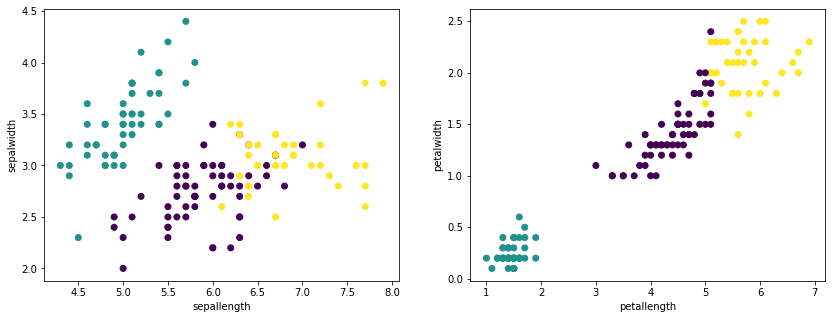

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

plt.subplot(122)
plt.scatter(X.iloc[:,2], X.iloc[:,3], c=y_pred)
plt.xlabel(X.columns[2])
plt.ylabel(X.columns[3])

**b) 3D visualizations**

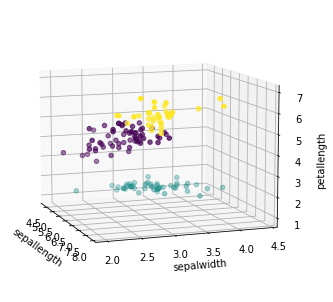

In [12]:
import mpl_toolkits.mplot3d.axes3d as p3

ax = p3.Axes3D(plt.figure())
ax.view_init(10, -20)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_pred, s=20) #edgecolor='k')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
plt.show()

**c) plot incorrect predictions**<br>(please note that errors in red can overlap correct predictions)

incorrect observations: [52, 77, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]


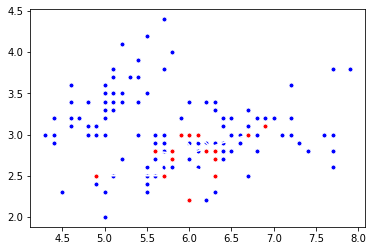

In [13]:
# identify incorrect predictions (pre-matching is necessary)
y_ref = y_true.map(codes)
changes = [i for i in range(len(y_ref)) if y_ref[i] != y_pred[i]]
print("incorrect observations:",changes)

# plot incorrect predictions 
plt.plot(X.iloc[:,0], X.iloc[:,1], 'w', markerfacecolor='b', marker='.', markersize=10)
plt.plot(X.iloc[changes,0], X.iloc[changes,1], 'w', markerfacecolor='r', marker='.', markersize=10)
plt.show()

# 4) EM clustering

In [14]:
from sklearn.mixture import GaussianMixture

# learn EM with multivariate Gaussian assumption
em_algo = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=0)
em_model = em_algo.fit(X)

# describe EM solution
print("means:\n",em_model.means_,"\n\ncovariances:\n",em_model.covariances_)

means:
 [[5.006      3.418      1.464      0.244     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]
 [6.54639415 2.94946365 5.48364578 1.98726565]] 

covariances:
 [[[0.121765   0.098292   0.015816   0.010336  ]
  [0.098292   0.142277   0.011448   0.011208  ]
  [0.015816   0.011448   0.029505   0.005584  ]
  [0.010336   0.011208   0.005584   0.011265  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]

 [[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]]


In [15]:
# instead of retrieving clusters directly, let us use predict function
y_pred = em_model.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


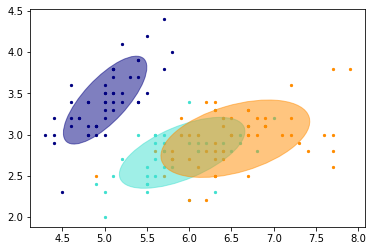

In [18]:
import matplotlib as mpl

# let us visualize the EM solution

fig, ax = plt.subplots()
colors = ["navy", "turquoise", "darkorange"]

for n, color in enumerate(colors):
    
    # 1) plot points
    rows = np.where(y_pred == n)[0]
    ax.scatter(X.iloc[rows, 0], X.iloc[rows, 1], s=5, color=color)
    
    # 2) plot ellipse
    covariances = em_model.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = 180 * np.arctan2(u[1], u[0]) / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(em_model.means_[n, :2], v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.show()